In [1]:
import numpy as np
import GPy
import GPyOpt
from GPyOpt.models.gpmodel import GPModel
from GPyOpt.core.task.space import Design_space, bounds_to_space
from GPyOpt.acquisitions.ES import AcquisitionEntropySearch
from GPyOpt.acquisitions.EI import AcquisitionEI

## Set up a 2D problem using Branin function with temperature and pressure as the variable


https://uqworld.org/t/branin-function/53



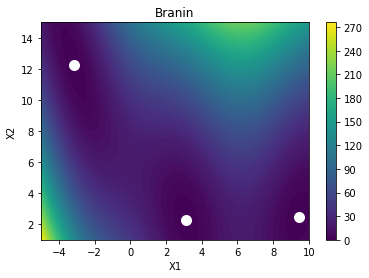

In [5]:
# --- Function to optimize
func  = GPyOpt.objective_examples.experiments2d.branin()
func.plot()

In [3]:
objective = GPyOpt.core.task.SingleObjective(func.f)
space = GPyOpt.Design_space(space =[{'name': 'pressure', 'type': 'continuous', 'domain': (-5,10)},
                                    {'name': 'temperature', 'type': 'continuous', 'domain': (1,15)}])
acquisition_optimizer = GPyOpt.optimization.AcquisitionOptimizer(space)
initial_design = GPyOpt.experiment_design.initial_design('random', space, 5)
max_iter = 10

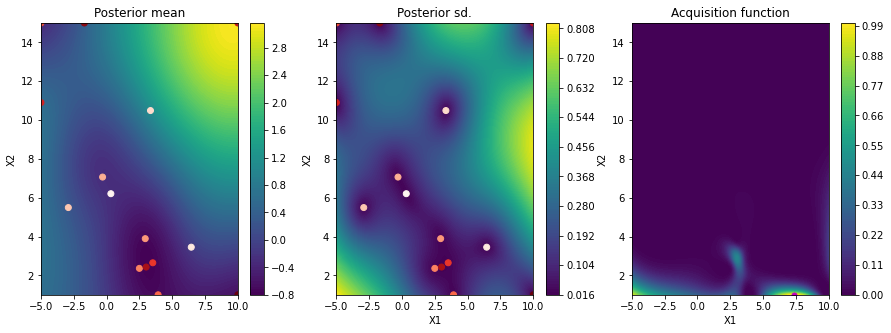

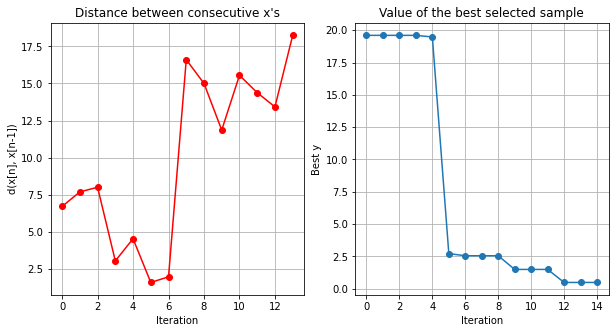

In [4]:
##Run Expected Improvement.


ei_model = GPyOpt.models.GPModel(optimize_restarts=5,verbose=False)
ei = AcquisitionEI(ei_model, space, optimizer=acquisition_optimizer)
ei_evaluator = GPyOpt.core.evaluators.Sequential(ei)
bo_ei = GPyOpt.methods.ModularBayesianOptimization(ei_model, space, objective, ei, ei_evaluator, initial_design)
bo_ei.run_optimization(max_iter = max_iter)
bo_ei.plot_acquisition()
bo_ei.plot_convergence()